In [13]:
from statsmodels.stats.power import TTestIndPower
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

In [10]:
# parameters for the analysis 
effect_size = 0.8
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))


Required sample size: 25.52


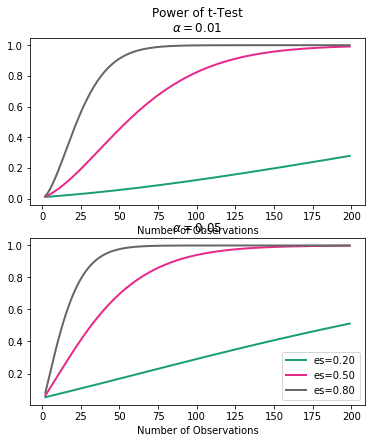

In [14]:
# power vs. number of observations 

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 1.4)


In [15]:
# for this part I assume significance level of 0.05
import plotly.plotly as py
import plotly.graph_objs as go

@np.vectorize
def power_grid(x,y):
    power = TTestIndPower().solve_power(effect_size = x, 
                                        nobs1 = y, 
                                        alpha = 0.05)
    return power

X,Y = np.meshgrid(np.linspace(0.01, 1, 51), 
                  np.linspace(10, 1000, 100))
X = X.T
Y = Y.T

Z = power_grid(X, Y) # power

data = [go.Surface(x = effect_size, y= Y, z = Z)]

layout = go.Layout(
    title='Power Analysis',
    scene = dict(
                    xaxis = dict(
                        title='effect size'),
                    yaxis = dict(
                        title='number of observations'),
                    zaxis = dict(
                        title='power'),)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='power_analysis')

Aw, snap! We didn't get a username with your request.

Don't have an account? https://plot.ly/api_signup

Questions? accounts@plot.ly


PlotlyError: Because you didn't supply a 'file_id' in the call, we're assuming you're trying to snag a figure from a url. You supplied the url, '', we expected it to start with 'https://plot.ly'.
Run help on this function for more information.